# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url
        #added this code(from lesson 6.2)
        weather_response = requests.get(city_weather)
        weather_json = weather_response.json()


        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | alexandria
Processing Record 3 of Set 1 | kavieng
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | moerai
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | pevek
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | hoquiam
Processing Record 15 of Set 1 | cape town
Processing Record 16 of Set 1 | takoradi
Processing Record 17 of Set 1 | sola
Processing Record 18 of Set 1 | iqaluit
Processing Record 19 of Set 1 | camacha
Processing Record 20 of Set 1 | busselton
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | illoqqortoormiut
City not found. S

City not found. Skipping...
Processing Record 36 of Set 4 | hambantota
Processing Record 37 of Set 4 | ozark
Processing Record 38 of Set 4 | coquimbo
Processing Record 39 of Set 4 | caldas novas
Processing Record 40 of Set 4 | volchansk
Processing Record 41 of Set 4 | lavrentiya
Processing Record 42 of Set 4 | noyabrsk
Processing Record 43 of Set 4 | tapiramuta
Processing Record 44 of Set 4 | nantucket
Processing Record 45 of Set 4 | batagay
Processing Record 46 of Set 4 | vostok
Processing Record 47 of Set 4 | yershov
Processing Record 48 of Set 4 | buraydah
Processing Record 49 of Set 4 | golden
Processing Record 0 of Set 5 | severo-kurilsk
Processing Record 1 of Set 5 | sorland
Processing Record 2 of Set 5 | esil
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | eufaula
Processing Record 5 of Set 5 | tarakan
Processing Record 6 of Set 5 | tabiauea
City not found. Skipping...
Processing Record 7 of Set 5 | hasaki
Processing Record 8 of Set 5 | hargeysa
Processing

Processing Record 26 of Set 8 | jucas
Processing Record 27 of Set 8 | pescara
Processing Record 28 of Set 8 | lianyuan
Processing Record 29 of Set 8 | deputatskiy
Processing Record 30 of Set 8 | konibodom
Processing Record 31 of Set 8 | saldanha
Processing Record 32 of Set 8 | saryshagan
City not found. Skipping...
Processing Record 33 of Set 8 | kushikino
Processing Record 34 of Set 8 | san cristobal
Processing Record 35 of Set 8 | avera
Processing Record 36 of Set 8 | ahipara
Processing Record 37 of Set 8 | kysyl-syr
Processing Record 38 of Set 8 | port augusta
Processing Record 39 of Set 8 | najran
Processing Record 40 of Set 8 | rabat
Processing Record 41 of Set 8 | nemuro
Processing Record 42 of Set 8 | visnes
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | zhuhai
Processing Record 45 of Set 8 | pinawa
Processing Record 46 of Set 8 | nandikotkur
Processing Record 47 of Set 8 | mapastepec
Processing Record 48 of Set 8 | kompaniyivka
Processing Record 49 of 

Processing Record 16 of Set 12 | sayyan
Processing Record 17 of Set 12 | aktau
Processing Record 18 of Set 12 | kokopo
Processing Record 19 of Set 12 | msanga
Processing Record 20 of Set 12 | bandarbeyla
Processing Record 21 of Set 12 | morant bay
Processing Record 22 of Set 12 | satitoa
City not found. Skipping...
Processing Record 23 of Set 12 | maracas
Processing Record 24 of Set 12 | banamba
Processing Record 25 of Set 12 | quatre cocos
Processing Record 26 of Set 12 | antigonish
Processing Record 27 of Set 12 | indiaroba
Processing Record 28 of Set 12 | fillan
Processing Record 29 of Set 12 | rio claro
Processing Record 30 of Set 12 | omsukchan
Processing Record 31 of Set 12 | remontnoye
Processing Record 32 of Set 12 | bubaque
Processing Record 33 of Set 12 | saint-pierre
Processing Record 34 of Set 12 | mogochin
City not found. Skipping...
Processing Record 35 of Set 12 | umm lajj
Processing Record 36 of Set 12 | antofagasta
Processing Record 37 of Set 12 | talnakh
Processing Re

In [23]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          557
Lat           557
Lng           557
Max Temp      557
Humidity      557
Cloudiness    557
Wind Speed    557
Country       557
Date          557
dtype: int64

In [24]:
#convert max temp from Kelvin to Celsius
city_df = city_data_df.copy()
city_df["Max Temp Celsius"] = city_df["Max Temp"]-273
city_df = city_df.drop(["Max Temp"], axis=1)
# Display sample data
city_df.head()

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
0,ilulissat,69.2167,-51.1000,93,75,2.06,GL,1687599345,2.16
1,alexandria,31.2156,29.9553,50,0,4.20,EG,1687599105,28.73
2,kavieng,-2.5744,150.7967,77,41,1.78,PG,1687599346,27.35
3,new norfolk,-42.7826,147.0587,80,100,0.88,AU,1687599348,8.43
4,moerai,-22.4333,-151.3333,85,100,5.50,PF,1687599349,24.86


In [25]:
# Export the City_Data into a csv
city_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [26]:
# Read saved data
city_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_df.head()

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,93,75,2.06,GL,1687599345,2.16
1,alexandria,31.2156,29.9553,50,0,4.20,EG,1687599105,28.73
2,kavieng,-2.5744,150.7967,77,41,1.78,PG,1687599346,27.35
3,new norfolk,-42.7826,147.0587,80,100,0.88,AU,1687599348,8.43
4,moerai,-22.4333,-151.3333,85,100,5.50,PF,1687599349,24.86


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

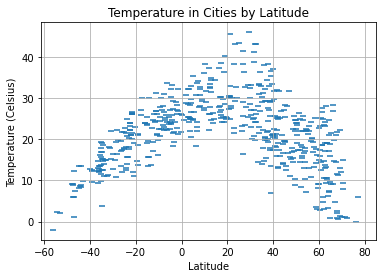

In [27]:
# Build scatter plot for latitude vs. temperature
#used module 6.2 Activity 5, for alike examples
plt.scatter(city_df["Lat"], city_df["Max Temp Celsius"], marker=0)

# Incorporate the other graph properties
plt.title("Temperature in Cities by Latitude")
plt.ylabel("Temperature (Celsius)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

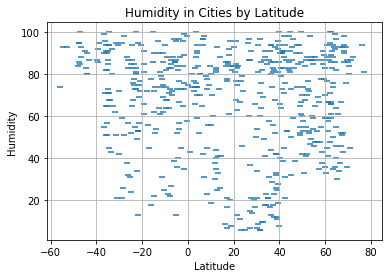

In [28]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_df["Lat"], city_df["Humidity"], marker=0)

# Incorporate the other graph properties
plt.title("Humidity in Cities by Latitude")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

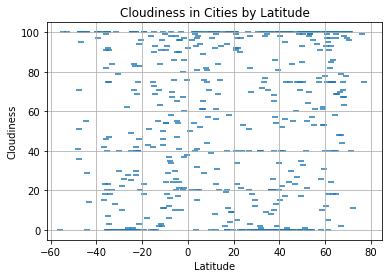

In [29]:
#Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_df["Lat"], city_df["Cloudiness"], marker=0)

# Incorporate the other graph properties
plt.title("Cloudiness in Cities by Latitude")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

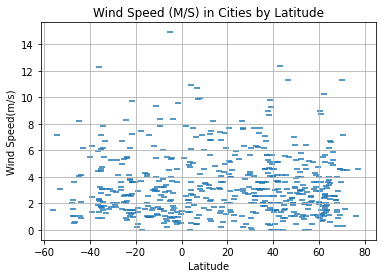

In [30]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_df["Lat"], city_df["Wind Speed"], marker=0)

# Incorporate the other graph properties
plt.title("Wind Speed (M/S) in Cities by Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [31]:
# Define a function to create Linear Regression plots
def regression_plots(x,y):
    #use linregress function
    slope, intercept, rvalue, pvalue, stderr = linregress(x, y)
    #regression line
    regress_values = x * slope + intercept
    #the line equation in variable to show
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #plot
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    print (f"The slope of the line is {line_eq}")
    print (f"The r-value/correlation of this graph is {rvalue}")
    plt.xlabel("Latitude")
    plt.show()
    #plt.ylabel will be defined within each cell since y changes with each graph
#module 5.3 activity 8 contains good nuggets of info

In [32]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_df[city_df["Lat"]>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
City_ID,,,,,,,,,
0,ilulissat,69.2167,-51.1000,93,75,2.06,GL,1687599345,2.16
1,alexandria,31.2156,29.9553,50,0,4.20,EG,1687599105,28.73
6,kodiak,57.7900,-152.4072,87,100,2.57,US,1687599350,10.88
8,dikson,73.5069,80.5464,88,11,4.53,RU,1687599351,0.86
9,pevek,69.7008,170.3133,98,63,2.92,RU,1687599353,0.55


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_df[city_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp Celsius
City_ID,,,,,,,,,
2,kavieng,-2.5744,150.7967,77,41,1.78,PG,1687599346,27.35
3,new norfolk,-42.7826,147.0587,80,100,0.88,AU,1687599348,8.43
4,moerai,-22.4333,-151.3333,85,100,5.50,PF,1687599349,24.86
5,vaini,-21.2000,-175.2000,83,40,1.54,TO,1687599349,22.24
7,rikitea,-23.1203,-134.9692,65,100,8.28,PF,1687599351,21.58


###  Temperature vs. Latitude Linear Regression Plot

The slope of the line is y = -0.29x + 34.31
The r-value/correlation of this graph is -0.6456141770378276


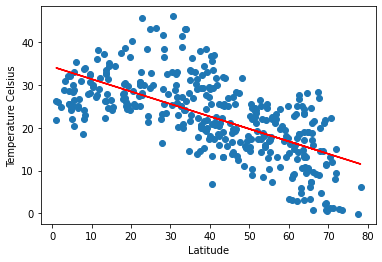

In [34]:
# Linear regression on Northern Hemisphere
#for some reason the y label only works when I put it first in the code
plt.ylabel("Temperature Celsius")
regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp Celsius"])



The slope of the line is y = 0.41x + 27.77
The r-value/correlation of this graph is 0.8222675908358966


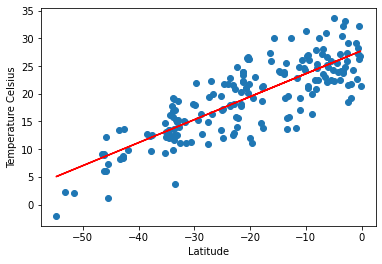

In [35]:
# Linear regression on Southern Hemisphere
plt.ylabel("Temperature Celsius")
regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp Celsius"])


**Discussion about the linear relationship:** As expected as the latitude gets closer to zero (the equator is at latitude zero), the temperature gets hotter. If we look at how the earth rotates, the equator is constantly getting sun, regardless if its winter or summer, hence it will be relatively hot regardless of the season.

### Humidity vs. Latitude Linear Regression Plot

The slope of the line is y = 0.11x + 60.21
The r-value/correlation of this graph is 0.08669199069635862


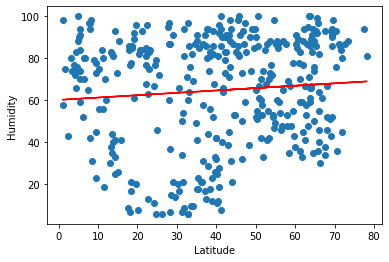

In [36]:
# Northern Hemisphere
plt.ylabel("Humidity")
regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

The slope of the line is y = -0.32x + 65.07
The r-value/correlation of this graph is -0.20584191489535816


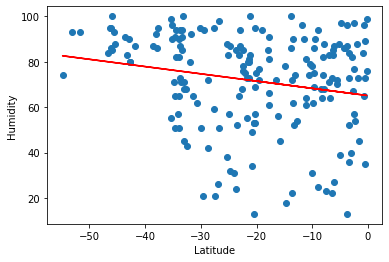

In [37]:
# Southern Hemisphere
plt.ylabel("Humidity")
regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The slope of the line is y = 0.26x + 46.89
The r-value/correlation of this graph is 0.13346269184417145


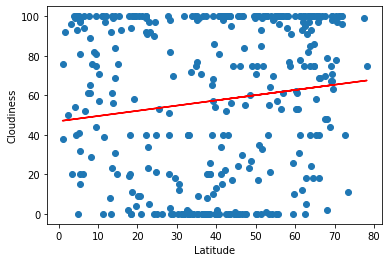

In [38]:
# Northern Hemisphere
plt.ylabel("Cloudiness")
regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

The slope of the line is y = -0.11x + 48.36
The r-value/correlation of this graph is -0.03905864135801236


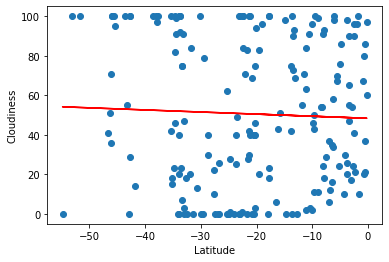

In [39]:
# Southern Hemisphere
plt.ylabel("Cloudiness")
regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The slope of the line is y = -0.01x + 3.92
The r-value/correlation of this graph is -0.10835201526653516


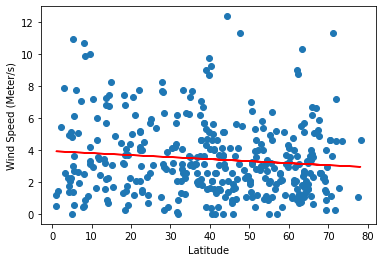

In [40]:
# Northern Hemisphere
plt.ylabel("Wind Speed (Meter/s)")
regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

The slope of the line is y = -0.01x + 3.06
The r-value/correlation of this graph is -0.034048002727281014


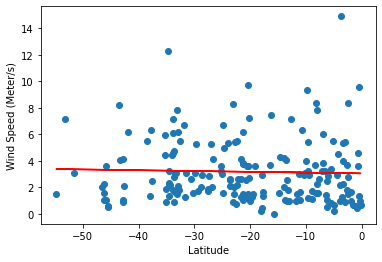

In [41]:
# Southern Hemisphere
plt.ylabel("Wind Speed (Meter/s)")
regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

**Discussion about the linear relationship:** Humidity does not show strong correlation, as we get -.07 and .02 for the Northern and Southern hemisphere respectively. As for cloudiness we dont see strong correlation in the North vs South with respective numbers coming in at -.04 vs -.21. We do see some but still relatively weak in the Southern Hemisphere. Lastly for windspeed we see .1 and -.1 for the North vs South respectively, which shows weak correlation, however is is interesting to see they have exact opposite correlation numbers. Not much to investigate though.
